## Creating CNN Using Scratch And Transfer Learning

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'cell_images/Train'
valid_path = 'cell_images/Test'


In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




80142336/80134624 [==============================] - 75s 1us/step


In [6]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('C:/Anaconda/data/Dataset1/Train/*')

In [8]:
folders

['C:/Anaconda/data/Dataset1/Train\\Parasite',
 'C:/Anaconda/data/Dataset1/Train\\Uninfected']

In [9]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [11]:

# view the structure of the model
model.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [12]:
from tensorflow.keras.layers import MaxPooling2D

In [13]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [15]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:/Anaconda/data/Dataset1/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [17]:
training_set

In [18]:
test_set = test_datagen.flow_from_directory('C:/Anaconda/data/Dataset1/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [21]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
13/13 [==============================] - 13s 965ms/step - loss: 1.7289 - accuracy: 0.5312 - val_loss: 0.6479 - val_accuracy: 0.6791
Epoch 2/50
13/13 [==============================] - 12s 961ms/step - loss: 0.7063 - accuracy: 0.5216 - val_loss: 0.6973 - val_accuracy: 0.4478
Epoch 3/50
13/13 [==============================] - 13s 1s/step - loss: 0.6299 - accuracy: 0.6803 - val_loss: 0.7061 - val_accuracy: 0.4701
Epoch 4/50
13/13 [==============================] - 13s 1s/step - loss: 0.4914 - accuracy: 0.7620 - val_loss: 1.0399 - val_accuracy: 0.3881
Epoch 5/50
13/13 [==============================] - 14s 1s/step - loss: 0.4576 - accuracy: 0.7764 - val_loss: 0.7296 - val_accuracy: 0.5597
Epoch 6/50
13/13 [==============================] - 15s 1s/step - loss: 0.3623 - accuracy: 0.8510 - val_loss: 0.7969 - val_accuracy: 0.5224
Epoch 7/50
13/13 [==============================] - 15s 1s/step - loss: 0.3405

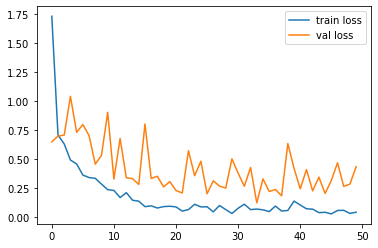

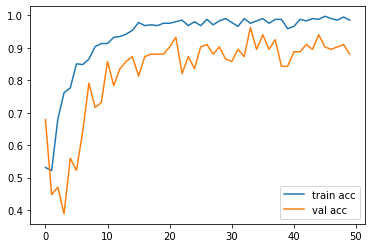

<Figure size 432x288 with 0 Axes>

In [22]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [23]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [24]:

y_pred = model.predict(test_set)


In [25]:
y_pred

array([[1.00000000e+00, 3.56422376e-08],
       [5.78848994e-04, 9.99421120e-01],
       [3.18908170e-02, 9.68109190e-01],
       [1.00000000e+00, 2.44241628e-12],
       [9.98807788e-01, 1.19221257e-03],
       [9.99730408e-01, 2.69536191e-04],
       [1.00000000e+00, 1.37310883e-08],
       [9.99762714e-01, 2.37332788e-04],
       [1.00000000e+00, 6.60597811e-20],
       [9.99999762e-01, 2.85016171e-07],
       [1.00000000e+00, 4.36719855e-10],
       [1.00000000e+00, 2.76009450e-18],
       [6.73595145e-02, 9.32640493e-01],
       [3.13304774e-02, 9.68669474e-01],
       [6.86897023e-04, 9.99313116e-01],
       [7.07084779e-04, 9.99292850e-01],
       [3.21570644e-03, 9.96784329e-01],
       [9.99999762e-01, 2.39877465e-07],
       [3.69862258e-03, 9.96301413e-01],
       [9.99994636e-01, 5.31059368e-06],
       [7.37761892e-03, 9.92622375e-01],
       [7.43608549e-02, 9.25639212e-01],
       [4.26819548e-04, 9.99573171e-01],
       [2.63918913e-03, 9.97360766e-01],
       [1.894105

In [26]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [27]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0], dtype=int64)

In [28]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [29]:
model=load_model('model_vgg19.h5')

In [30]:
img=image.load_img('C:/Anaconda/data/Dataset1/Test/Uninfected/2.png',target_size=(224,224))



In [33]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [34]:
x.shape

(224, 224, 3)

In [35]:
x=x/255

In [36]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [37]:
model.predict(img_data)

array([[0., 1.]], dtype=float32)

In [38]:
a=np.argmax(model.predict(img_data), axis=1)

In [42]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
